In [42]:
# required for the custom KNN implementation
import numpy as np
from collections import Counter

# to generate a dataset
import random
from sklearn.model_selection import train_test_split

# for testing the algorithm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Custom KNN Implementation

In [43]:
class KNN:
    def __init__(self, k: int) -> None:
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        return [self._predict(x) for x in X]

    def _predict(self, x) -> int:
        # determine the distances
        distances = [self._euclidean_distance(x, x_train) for x_train in self.X_train]

        # get the closest k neighbors
        k_indicies = np.argsort(distances)[:self.k]
        k_labels = [self.y_train[i] for i in k_indicies]

        # determine the most common label of the group
        return Counter(k_labels).most_common(1)[0][0]

    def _euclidean_distance(self, point1: list, point2: list) -> float:

        # can only calculate distance if both points are of the same dimensionality
        if len(point1) != len(point2):
            raise ValueError("Both points must have the same number of dimensions.")
        
        # squaring the difference in distances in each dimension, summing them and then square rooting this sum
        return sum((q - p)**2 for p, q in zip(point1, point2))**0.5

## Generating Synthetic Dataset

In [44]:
# function to generate a gaussian cluster
def generate_data_point(center):
    return [c + random.gauss(0, 0.5) for c in center]

# generate data points
num_points = 100
class_A = [generate_data_point([1, 1, 1]) for _ in range(num_points)]
class_B = [generate_data_point([2, 1, 2]) for _ in range(num_points)]
class_C = [generate_data_point([3, 3, 3]) for _ in range(num_points)]

# combine data points from both classes and assign labels
X = class_A + class_B + class_C
y = [1] * num_points + [0] * num_points + [2] * num_points

Split into testing and training subsets

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

Fitting the classifer

In [46]:
clf = KNN(k=2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

## 3D Visualisation

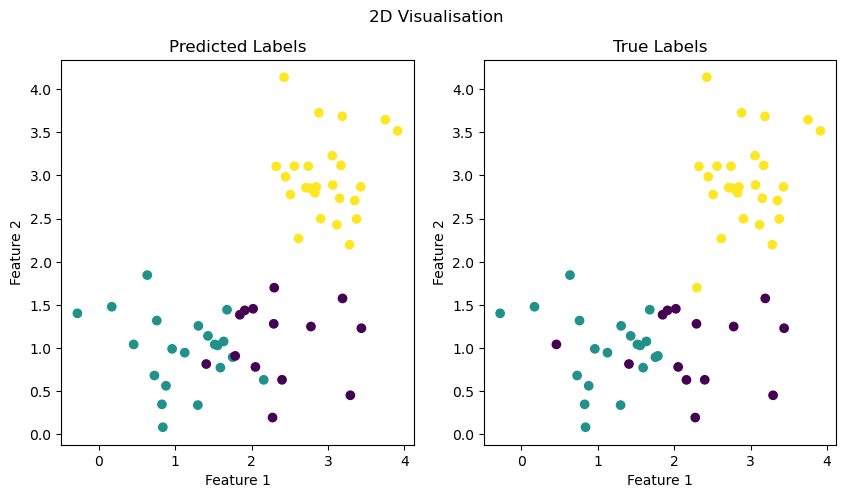

In [47]:
x_coords = [point[0] for point in X_test]
y_coords = [point[1] for point in X_test]

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Predicted Labels')
plt.scatter(x_coords, y_coords, c=y_pred, cmap='viridis')

plt.subplot(1, 2, 2)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('True Labels')
plt.scatter(x_coords, y_coords, c=y_test, cmap='viridis')

plt.suptitle("2D Visualisation")

plt.show()

## 3D Visualisation

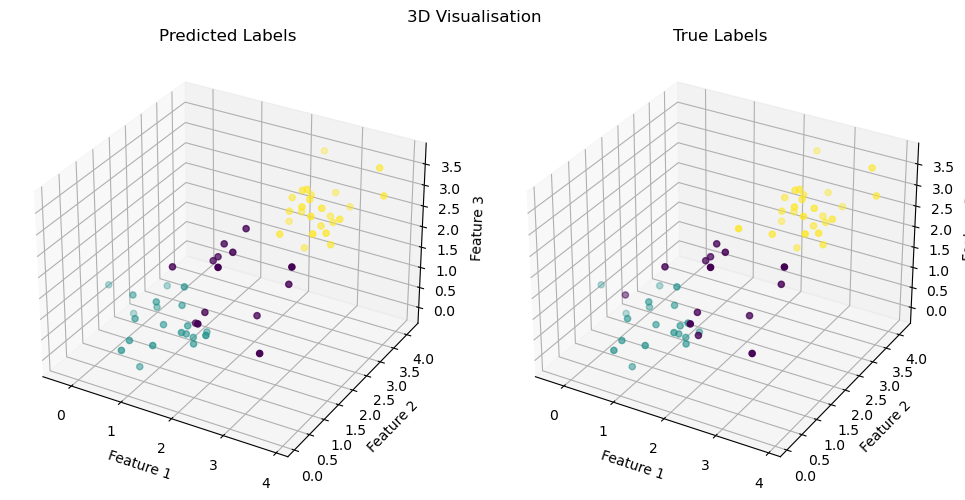

In [48]:
# Assuming X_test is 3D
x_coords = [point[0] for point in X_test]
y_coords = [point[1] for point in X_test]
z_coords = [point[2] for point in X_test]

fig = plt.figure(figsize=(10, 5))

# For Predicted Labels
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_zlabel('Feature 3')
ax1.set_title('Predicted Labels')
ax1.scatter(x_coords, y_coords, z_coords, c=y_pred, cmap='viridis')

# For True Labels
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.set_zlabel('Feature 3')
ax2.set_title('True Labels')
ax2.scatter(x_coords, y_coords, z_coords, c=y_test, cmap='viridis')

plt.suptitle("3D Visualisation")
plt.tight_layout()
plt.show()
